# Assignment 04 Machine Learning

## Name: Waleed Butt

## Reg# SP18-BCS-170

## BCS-6B

### Loading Data

In [10]:
import numpy as np
import pandas as pd
 
 
# Loading Data
 
# Google Drive
from google.colab import drive
drive.mount('/content/drive')
main_frame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IoT/IoT Intrusion Dataset 2020.csv')
 
# Windows Offline
# main_frame = pd.read_csv('C:\\users\\walee\\Google Drive\\sp18-bcs-170\\Colab Notebooks\\Iot\\IoT Intrusion Dataset 2020.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Getting the indexes of the columns to use for training.

In [23]:
data_columns = [main_frame.columns.get_loc(x) for x in main_frame.columns if main_frame[x].dtype != 'object']

# Part A, Label column as Output (Binary Classification)

In [24]:
# Deciding amount of data kept for testing (40%)
train_length = int(len(main_frame)*0.4)
 
# Data To Train Our Model with labels
train_data, train_label = main_frame.iloc[:-train_length, data_columns], main_frame.Label[:-train_length]
 
# Data to Test Our Model Later
test_data, test_label = main_frame.iloc[-train_length:, data_columns], main_frame.Label[-train_length:]
 
### Replacing Anomoly with 0 else 1
train_label = train_label.apply(lambda x: 1 if (x == 'Anomaly') else 0)
test_label = test_label.apply(lambda x: 1 if (x == 'Anomaly') else 0)
 
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

### Dimension Reduction

### PCA

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

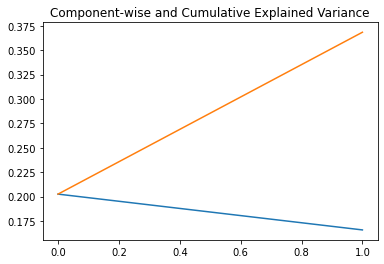

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

scalar = StandardScaler() 

scalar.fit(np.nan_to_num(train_data)) 
scaled_data = scalar.transform(np.nan_to_num(train_data)) 

# Let's say, components = 2 
pca = PCA(n_components = 2) 
pca.fit(scaled_data) 
x_pca = pca.transform(scaled_data) 

plt.plot(range(2), pca.explained_variance_ratio_)
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

### SVD

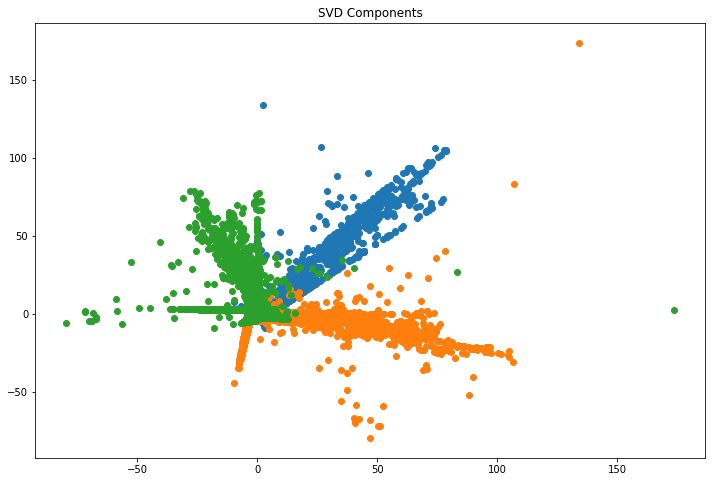

In [34]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(scaled_data)
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

### Factor Analysis

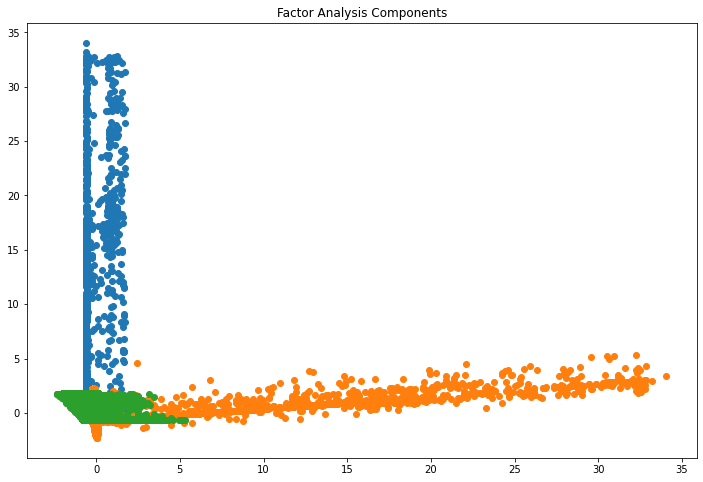

In [35]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(scaled_data)
#%matplotlib inline

plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

### Low Variance Filter

In [50]:
for i in train_data.columns:
  train_data[i].fillna(train_data[i].median(), inplace=True)

In [51]:
train_data.isnull().sum()/len(train_data)*100

Src_Port         0.0
Dst_Port         0.0
Protocol         0.0
Flow_Duration    0.0
Tot_Fwd_Pkts     0.0
                ... 
Active_Min       0.0
Idle_Mean        0.0
Idle_Std         0.0
Idle_Max         0.0
Idle_Min         0.0
Length: 79, dtype: float64

In [53]:
train_data.var()

Src_Port         6.118655e+08
Dst_Port         3.074456e+08
Protocol         2.899026e+01
Flow_Duration    1.249954e+07
Tot_Fwd_Pkts     1.831922e+01
                     ...     
Active_Min       4.111650e+03
Idle_Mean        4.565392e+06
Idle_Std         1.399337e+06
Idle_Max         8.538881e+06
Idle_Min         3.797772e+06
Length: 79, dtype: float32

In [ ]:
var = train_data.var()
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(train_data.iloc[i+1])
variable

### Naive Bayes

In [36]:
# training the model on training set 
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB() 
gnb.fit(np.nan_to_num(train_data), train_label)
 
# making predictions on the testing set 
y_pred = gnb.predict(np.nan_to_num(test_data))

### Decision Trees

In [37]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(np.nan_to_num(train_data), np.nan_to_num(train_label)) 
 
dtree_predictions = dtree_model.predict(np.nan_to_num(test_data))

### Classification report

In [38]:
from sklearn.metrics import classification_report

print("Naive Bayes")
print(classification_report(test_label, y_pred))
print("Decision Tree")
print(classification_report(test_label, dtree_predictions))

Naive Bayes
              precision    recall  f1-score   support

           0       0.28      0.41      0.33     15973
           1       0.96      0.93      0.94    234340

    accuracy                           0.89    250313
   macro avg       0.62      0.67      0.64    250313
weighted avg       0.91      0.89      0.90    250313

Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     15973
           1       0.99      1.00      0.99    234340

    accuracy                           0.99    250313
   macro avg       0.99      0.89      0.94    250313
weighted avg       0.99      0.99      0.99    250313



### Probability

In [39]:
y_pred_prob = gnb.predict_proba(np.nan_to_num(test_data))[:,1]

### Accuracy

In [40]:
from sklearn import metrics 
print("Bernoulli Naive Bayes: {:.5f} %".format(metrics.accuracy_score(test_label, y_pred)*100))
 
print("Decision tree Classifier: {:.5f} %".format(metrics.accuracy_score(test_label, dtree_predictions)*100))

Bernoulli Naive Bayes: 89.47518 %
Decision tree Classifier: 98.64729 %


### Precision

In [41]:
precision = metrics.precision_score(test_label, y_pred, average=None)
precision2 = metrics.precision_score(test_label, dtree_predictions, average=None)
 
print("Bernoulli Naive Bayes\nClass 0: {}, Class 1: {}".format(precision[0], precision[1]))
print("Decision Tree\nClass 0: {}, Class 1: {}".format(precision2[0], precision2[1]))

Bernoulli Naive Bayes
Class 0: 0.27852750256235054, Class 1: 0.9583467388286315
Decision Tree
Class 0: 0.9996030800984361, Class 1: 0.9857771458378906


### Recall

In [42]:
print("Bernoulli Naive Bayes: {:.4f}%".format(metrics.recall_score(test_label, y_pred)*100))
 
print("Decision Tree: {:.4f}%".format(metrics.recall_score(test_label, dtree_predictions)*100))

Bernoulli Naive Bayes: 92.7908%
Decision Tree: 99.9979%


#### Precision Recall Curve

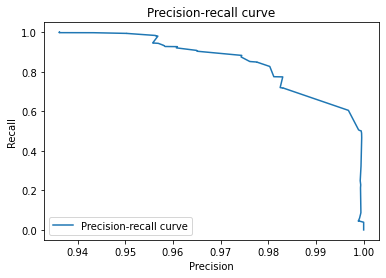

In [43]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(test_label, y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")

### F measure

In [44]:
print("Bernoulli Naive Bayes: {:.4f}%".format(metrics.fbeta_score(test_label, y_pred, beta=0.5)*100))
 
print("Decision Tree: {:.4f}%".format(metrics.fbeta_score(test_label, dtree_predictions, beta=0.5)*100))

Bernoulli Naive Bayes: 95.2100%
Decision Tree: 98.8585%


### F1 Score

In [48]:
f1score = metrics.f1_score(test_label, y_pred, average=None)
f1score2 = metrics.f1_score(test_label, dtree_predictions, average=None)
 
print("Bernoulli Naive Bayes\nClass 0: {}, Class 1: {}".format(f1score[0], f1score[1]))
print("Decision Tree\nClass 0: {}, Class 1: {}".format(f1score2[0], f1score2[1]))

Bernoulli Naive Bayes
Class 0: 0.33115844525121224, Class 1: 0.942881859000904
Decision Tree
Class 0: 0.8814840742037102, Class 1: 0.9928271222058399


### Roc Curves

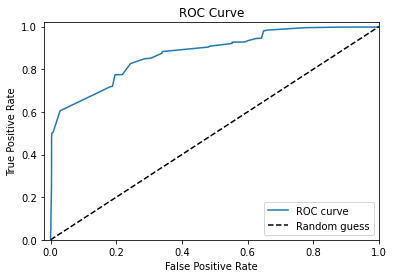

In [47]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(test_label, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

#### ROC Accuracy Score

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_label, y_pred_prob)

0.8764189325183098

### Confusion matrix

In [ ]:
confusion_matrix_nb = metrics.confusion_matrix(test_label, y_pred)
confusion_matrix_dtree = metrics.confusion_matrix(test_label, dtree_predictions)

print("Bernoulli Naive Bayes\n{}".format(metrics.confusion_matrix(test_label, y_pred)))
print("Decision Tree\n{}".format(metrics.confusion_matrix(test_label, dtree_predictions)))

Bernoulli Naive Bayes
[[  6522   9451]
 [ 16894 217446]]
Decision Tree
[[ 12592   3381]
 [     5 234335]]


true_positives = confusion_matrix[0][0]  
false_positives = confusion_matrix[0][1]  
true_negatives = confusion_matrix[1][1]  
false_negatives = confusion_matrix[1][0]  

### True Positive Rate

In [ ]:
print("Bernoulli Naive Bayes: {}".format(confusion_matrix_nb[0][0] / (confusion_matrix_nb[0][0] + confusion_matrix_nb[0][1])))
print("Decision Tree: {}".format(confusion_matrix_nb[0][0] / (confusion_matrix_dtree[0][0] + confusion_matrix_dtree[0][1])))

Bernoulli Naive Bayes: 0.40831402992549926
Decision Tree: 0.40831402992549926


### False Positive Rate

In [ ]:
print("Bernoulli Naive Bayes: {}".format(confusion_matrix_nb[0][1] / (confusion_matrix_nb[0][1] + confusion_matrix_nb[1][1])))
print("Decision Tree: {}".format(confusion_matrix_nb[0][1] / (confusion_matrix_dtree[0][1] + confusion_matrix_dtree[1][1])))

Bernoulli Naive Bayes: 0.04165326117136851
Decision Tree: 0.03975752578707365


### Sensitivity

In [ ]:
print("Bernoulli Naive Bayes: {}".format(confusion_matrix_nb[0][0] / (confusion_matrix_nb[0][0] + confusion_matrix_nb[0][1])))
print("Decision Tree: {}".format(confusion_matrix_nb[0][0] / (confusion_matrix_dtree[0][0] + confusion_matrix_dtree[0][1])))

Bernoulli Naive Bayes: 0.40831402992549926
Decision Tree: 0.40831402992549926


### Specificity

In [ ]:
print("Bernoulli Naive Bayes: {}".format(confusion_matrix_nb[1][1] / (confusion_matrix_nb[1][1] + confusion_matrix_nb[1][0])))
print("Decision Tree: {}".format(confusion_matrix_nb[1][1] / (confusion_matrix_dtree[1][1] + confusion_matrix_dtree[1][0])))

Bernoulli Naive Bayes: 0.9279081676196979
Decision Tree: 0.9279081676196979


# Part B, Sub Category as Output (Multi Classifier)

In [ ]:
# Deciding amount of data kept for testing (20%)
train_length = int(len(main_frame)*0.2)

# Data To Train Our Model with labels
train_data, train_label = main_frame.iloc[:-train_length, data_columns], main_frame.Sub_Cat[:-train_length]

# Data to Test Our Model Later
test_data, test_label = main_frame.iloc[-train_length:, data_columns], main_frame.Sub_Cat[-train_length:]

### Replacing String with floats
train_label = train_label.replace(main_frame.Sub_Cat.unique(), [0, 1, 2, 3, 4, 5, 6, 7, 8])
test_label = test_label.replace(main_frame.Sub_Cat.unique(), [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Converting to float32
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

### Naive Bayes

In [ ]:
# training the model on training set 
from sklearn.naive_bayes import BernoulliNB

X = np.nan_to_num(train_data.abs())
y = train_label

gnb = BernoulliNB().fit(X, y) 

# making predictions on the testing set 
y_pred = gnb.predict(np.nan_to_num(test_data.abs()))

# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Bernoulli Naive Bayes model accuracy {:.2f}%: ".format(metrics.accuracy_score(test_label, y_pred)*100))

Bernoulli Naive Bayes model accuracy 43.98%: 


### Decision Trees

In [ ]:
# training a KNN classifier 
from sklearn.tree import DecisionTreeClassifier

X_train = np.nan_to_num(train_data.abs())
y_train = train_label

X_test = np.nan_to_num(test_data.abs())
y_test = test_label

dtr = DecisionTreeClassifier().fit(X_train, y_train) 

# accuracy on X_test 
accuracy = dtr.score(X_test, y_test)
dtree_predictions = dtr.predict(X_test).astype('float32')
print("Decision tree Regressor model accuracy {:.2f} %".format(accuracy*100))

Decision tree Regressor model accuracy 74.64 %


### Classification report

In [ ]:
from sklearn.metrics import classification_report

print("Naive Bayes")
print(classification_report(test_label, y_pred))
print("Decision Tree")
print(classification_report(test_label, dtree_predictions))

Naive Bayes
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11134
           1       0.67      0.97      0.80     12055
           2       0.24      0.67      0.35     10567
           3       0.44      0.01      0.01     24197
           4       0.55      0.92      0.68     36592
           5       0.02      0.01      0.01     11094
           6       0.18      0.03      0.05      7982
           7       0.00      0.00      0.00      4438
           8       0.20      0.29      0.24      7097

    accuracy                           0.44    125156
   macro avg       0.26      0.32      0.24    125156
weighted avg       0.36      0.44      0.33    125156

Decision Tree
              precision    recall  f1-score   support

           0       0.14      0.19      0.16     11134
           1       1.00      1.00      1.00     12055
           2       0.86      0.95      0.90     10567
           3       0.93      0.98      0.95     2419

### Probability

In [ ]:
y_pred_prob = gnb.predict_proba(np.nan_to_num(test_data))[:,1]

### Accuracy

In [ ]:
from sklearn import metrics 
print("Bernoulli Naive Bayes: {:.5f} %".format(metrics.accuracy_score(y_test, y_pred)*100))
 
print("Decision tree Classifier: {:.5f} %".format(metrics.accuracy_score(y_test, dtree_predictions)*100))

Bernoulli Naive Bayes: 43.98351 %
Decision tree Classifier: 74.64045 %


### Precision

In [ ]:
precision = metrics.precision_score(test_label, y_pred, average=None)
precision2 = metrics.precision_score(test_label, dtree_predictions, average=None)
 
print("Bernoulli Naive Bayes\nClass 0: {}, Class 1: {}".format(precision[0], precision[1]))
print("Decision Tree\nClass 0: {}, Class 1: {}".format(precision2[0], precision2[1]))

Bernoulli Naive Bayes
Class 0: 0.0, Class 1: 0.6724848346114227
Decision Tree
Class 0: 0.13760683760683762, Class 1: 0.9995850966724753


### Recall

In [ ]:
print("Bernoulli Naive Bayes: {:.4f}%".format(metrics.recall_score(test_label, y_pred, average='micro')*100))
 
print("Decision Tree: {:.4f}%".format(metrics.recall_score(test_label, dtree_predictions, average='micro')*100))

Bernoulli Naive Bayes: 43.9835%
Decision Tree: 74.6404%


### F measure

In [ ]:
print("Bernoulli Naive Bayes: {:.4f}%".format(metrics.fbeta_score(test_label, y_pred, beta=0.5, average='micro')*100))
 
print("Decision Tree: {:.4f}%".format(metrics.fbeta_score(test_label, dtree_predictions, beta=0.5, average='micro')*100))

Bernoulli Naive Bayes: 43.9835%
Decision Tree: 74.6404%


### F1 Score

In [ ]:
f1score = metrics.f1_score(test_label, y_pred, average=None)
f1score2 = metrics.f1_score(test_label, dtree_predictions, average=None)
 
print("Bernoulli Naive Bayes\nClass 0: {}, Class 1: {}".format(f1score[0], f1score[1]))
print("Decision Tree\nClass 0: {}, Class 1: {}".format(f1score2[0], f1score2[1]))

Bernoulli Naive Bayes
Class 0: 0.0, Class 1: 0.7958955602966575
Decision Tree
Class 0: 0.15889766170665046, Class 1: 0.9994192317265411


### Confusion matrix

In [ ]:
confusion_matrix_nb = metrics.confusion_matrix(test_label, y_pred)
confusion_matrix_dtree = metrics.confusion_matrix(test_label, dtree_predictions)

print("Bernoulli Naive Bayes\n{}".format(metrics.confusion_matrix(test_label, y_pred)))
print("Decision Tree\n{}".format(metrics.confusion_matrix(test_label, dtree_predictions)))

Bernoulli Naive Bayes
[[    0   436  1270    29  8013    81   138     0  1167]
 [    0 11751    21    16   183    12    28     5    39]
 [    0   645  7130    11   723   715    77     0  1266]
 [    1  1335 11359   160  6383  2027   180     0  2752]
 [    0   455  1146    29 33630    71   139     0  1122]
 [    0   414  1111    29  7916    94   421     0  1109]
 [    0  1917  1221    32  3887   581   229     0   115]
 [    0   372  2578    10   597   343    14     0   524]
 [    0   149  4499    45   271    43    36     0  2054]]
Decision Tree
[[ 2093     0     0   527  5720  2794     0     0     0]
 [    0 12046     0     3     0     0     0     2     4]
 [    1     1 10075    30     2     0     2   426    30]
 [  211     2    40 23625    72    83    13    21   130]
 [ 6492     0     0   476 26829  2794     0     0     1]
 [ 6389     0     0   475  3120  1108     0     0     2]
 [   16     1     2    16     8     1  7921     4    13]
 [    3     0  1564    19     0     0     2  2828  

true_positives = confusion_matrix[0][0]  
false_positives = confusion_matrix[0][1]  
true_negatives = confusion_matrix[1][1]  
false_negatives = confusion_matrix[1][0]  

### True Positive Rate

In [ ]:
print("Bernoulli Naive Bayes: {}".format(confusion_matrix_nb[0][0] / (confusion_matrix_nb[0][0] + confusion_matrix_nb[0][1])))
print("Decision Tree: {}".format(confusion_matrix_nb[0][0] / (confusion_matrix_dtree[0][0] + confusion_matrix_dtree[0][1])))

Bernoulli Naive Bayes: 0.0
Decision Tree: 0.0


### False Positive Rate

In [ ]:
print("Bernoulli Naive Bayes: {}".format(confusion_matrix_nb[0][1] / (confusion_matrix_nb[0][1] + confusion_matrix_nb[1][1])))
print("Decision Tree: {}".format(confusion_matrix_nb[0][1] / (confusion_matrix_dtree[0][1] + confusion_matrix_dtree[1][1])))

Bernoulli Naive Bayes: 0.03577582670058259
Decision Tree: 0.03619458741490952


### Sensitivity

In [ ]:
print("Bernoulli Naive Bayes: {}".format(confusion_matrix_nb[0][0] / (confusion_matrix_nb[0][0] + confusion_matrix_nb[0][1])))
print("Decision Tree: {}".format(confusion_matrix_nb[0][0] / (confusion_matrix_dtree[0][0] + confusion_matrix_dtree[0][1])))

Bernoulli Naive Bayes: 0.0
Decision Tree: 0.0


### Specificity

In [ ]:
print("Bernoulli Naive Bayes: {}".format(confusion_matrix_nb[1][1] / (confusion_matrix_nb[1][1] + confusion_matrix_nb[1][0])))
print("Decision Tree: {}".format(confusion_matrix_nb[1][1] / (confusion_matrix_dtree[1][1] + confusion_matrix_dtree[1][0])))

Bernoulli Naive Bayes: 1.0
Decision Tree: 0.9755105429188112
